In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#load dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/incident_profile_95.csv')

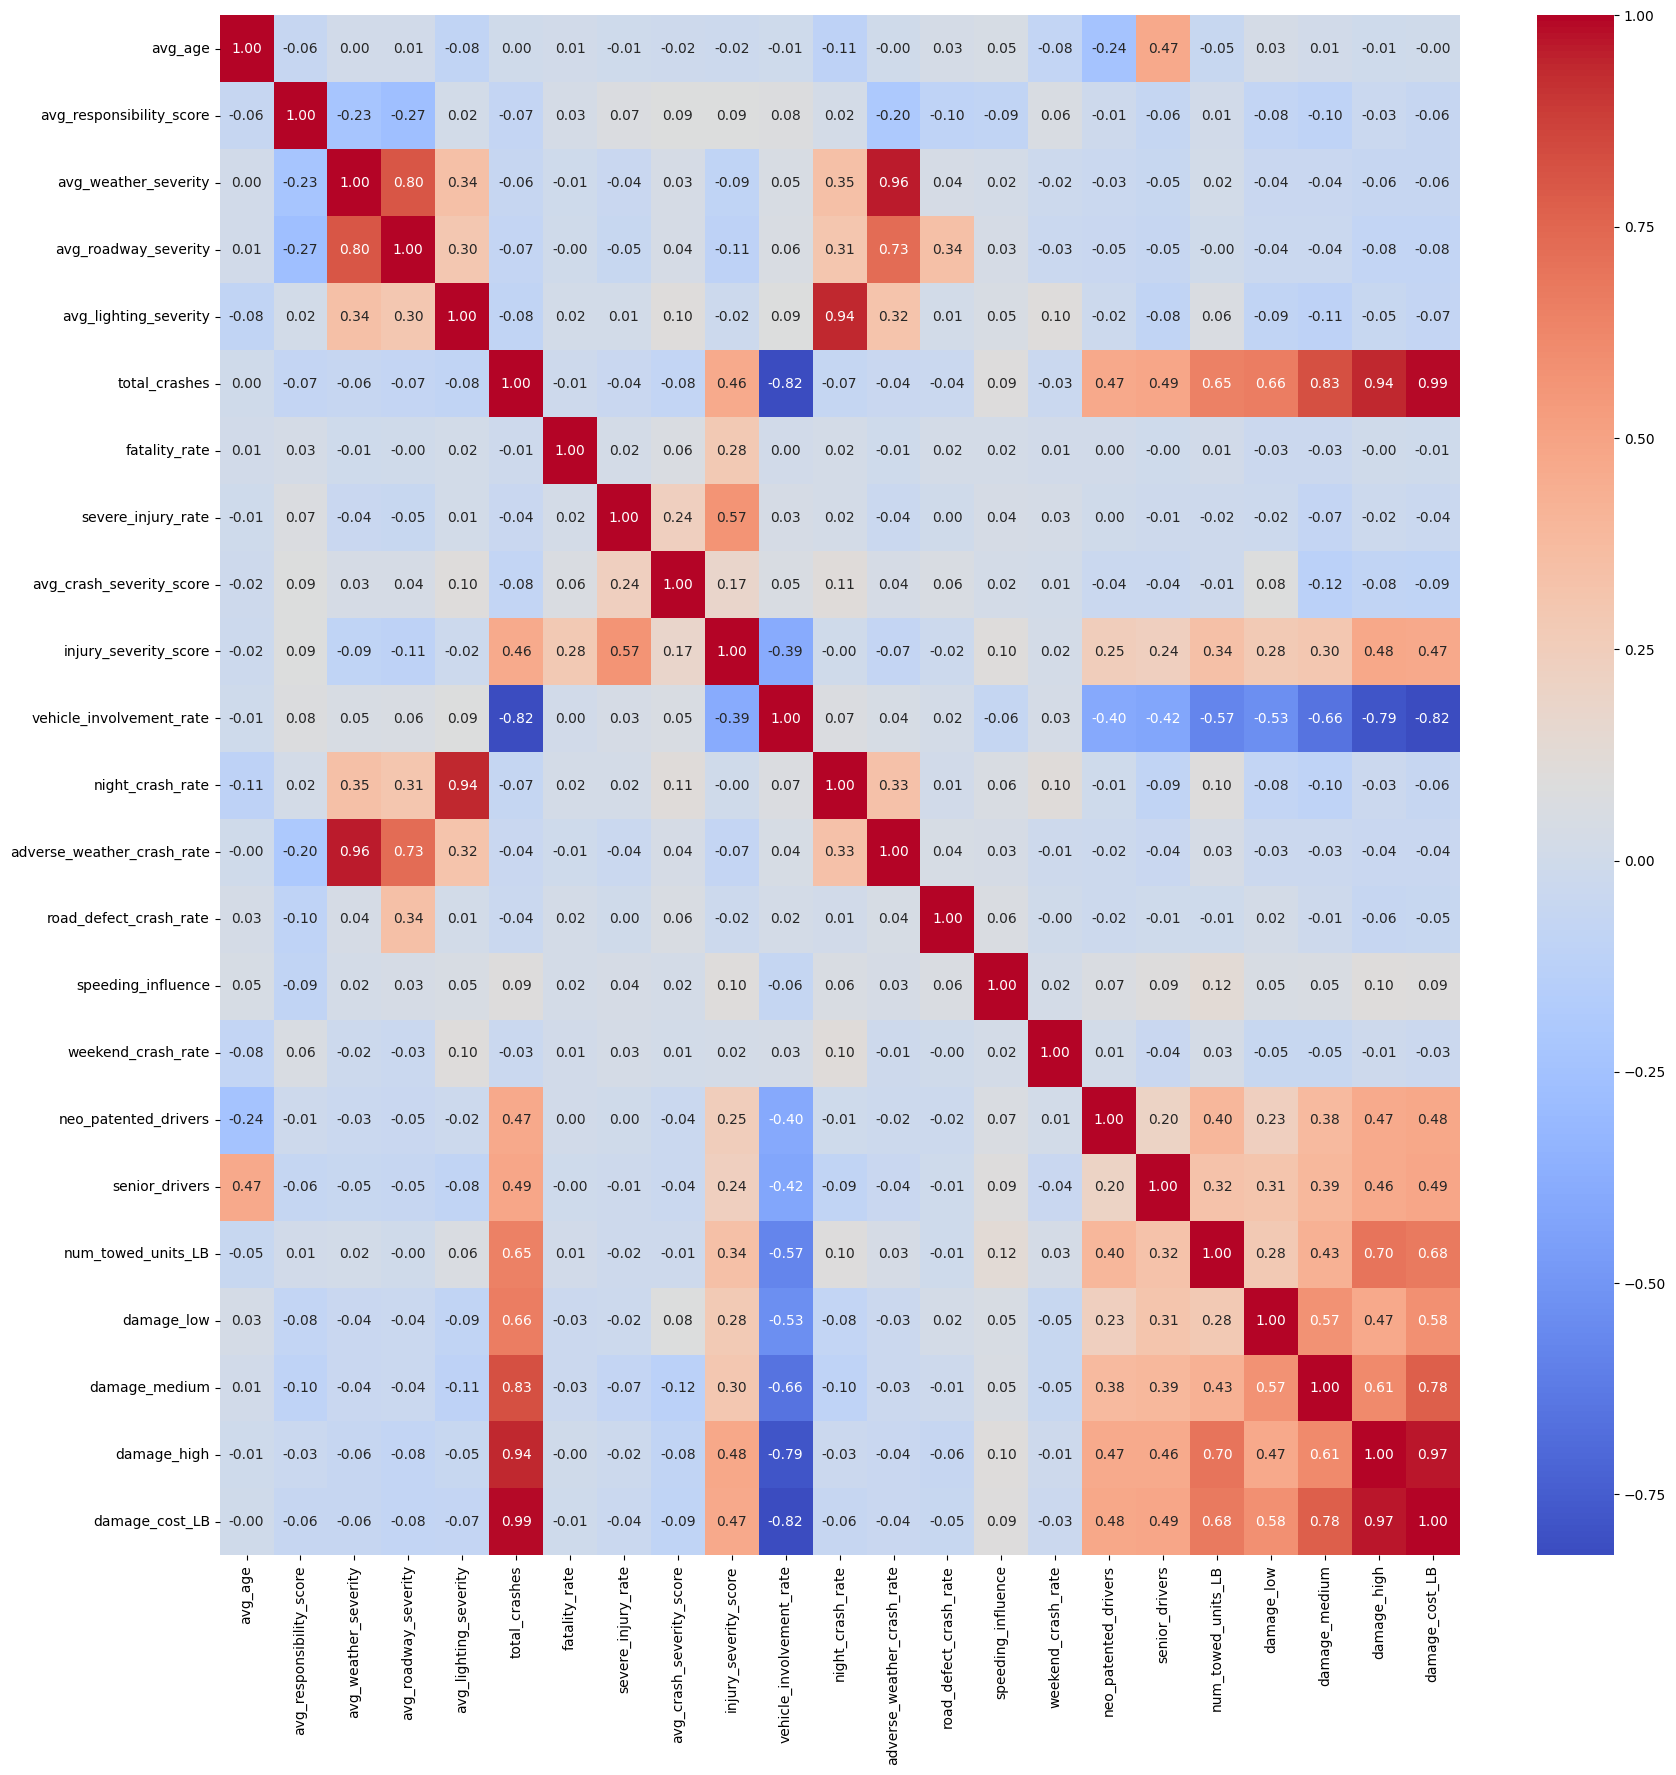

In [2]:
columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB']

plt.figure(figsize=(20, 20))
sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Features for clustering

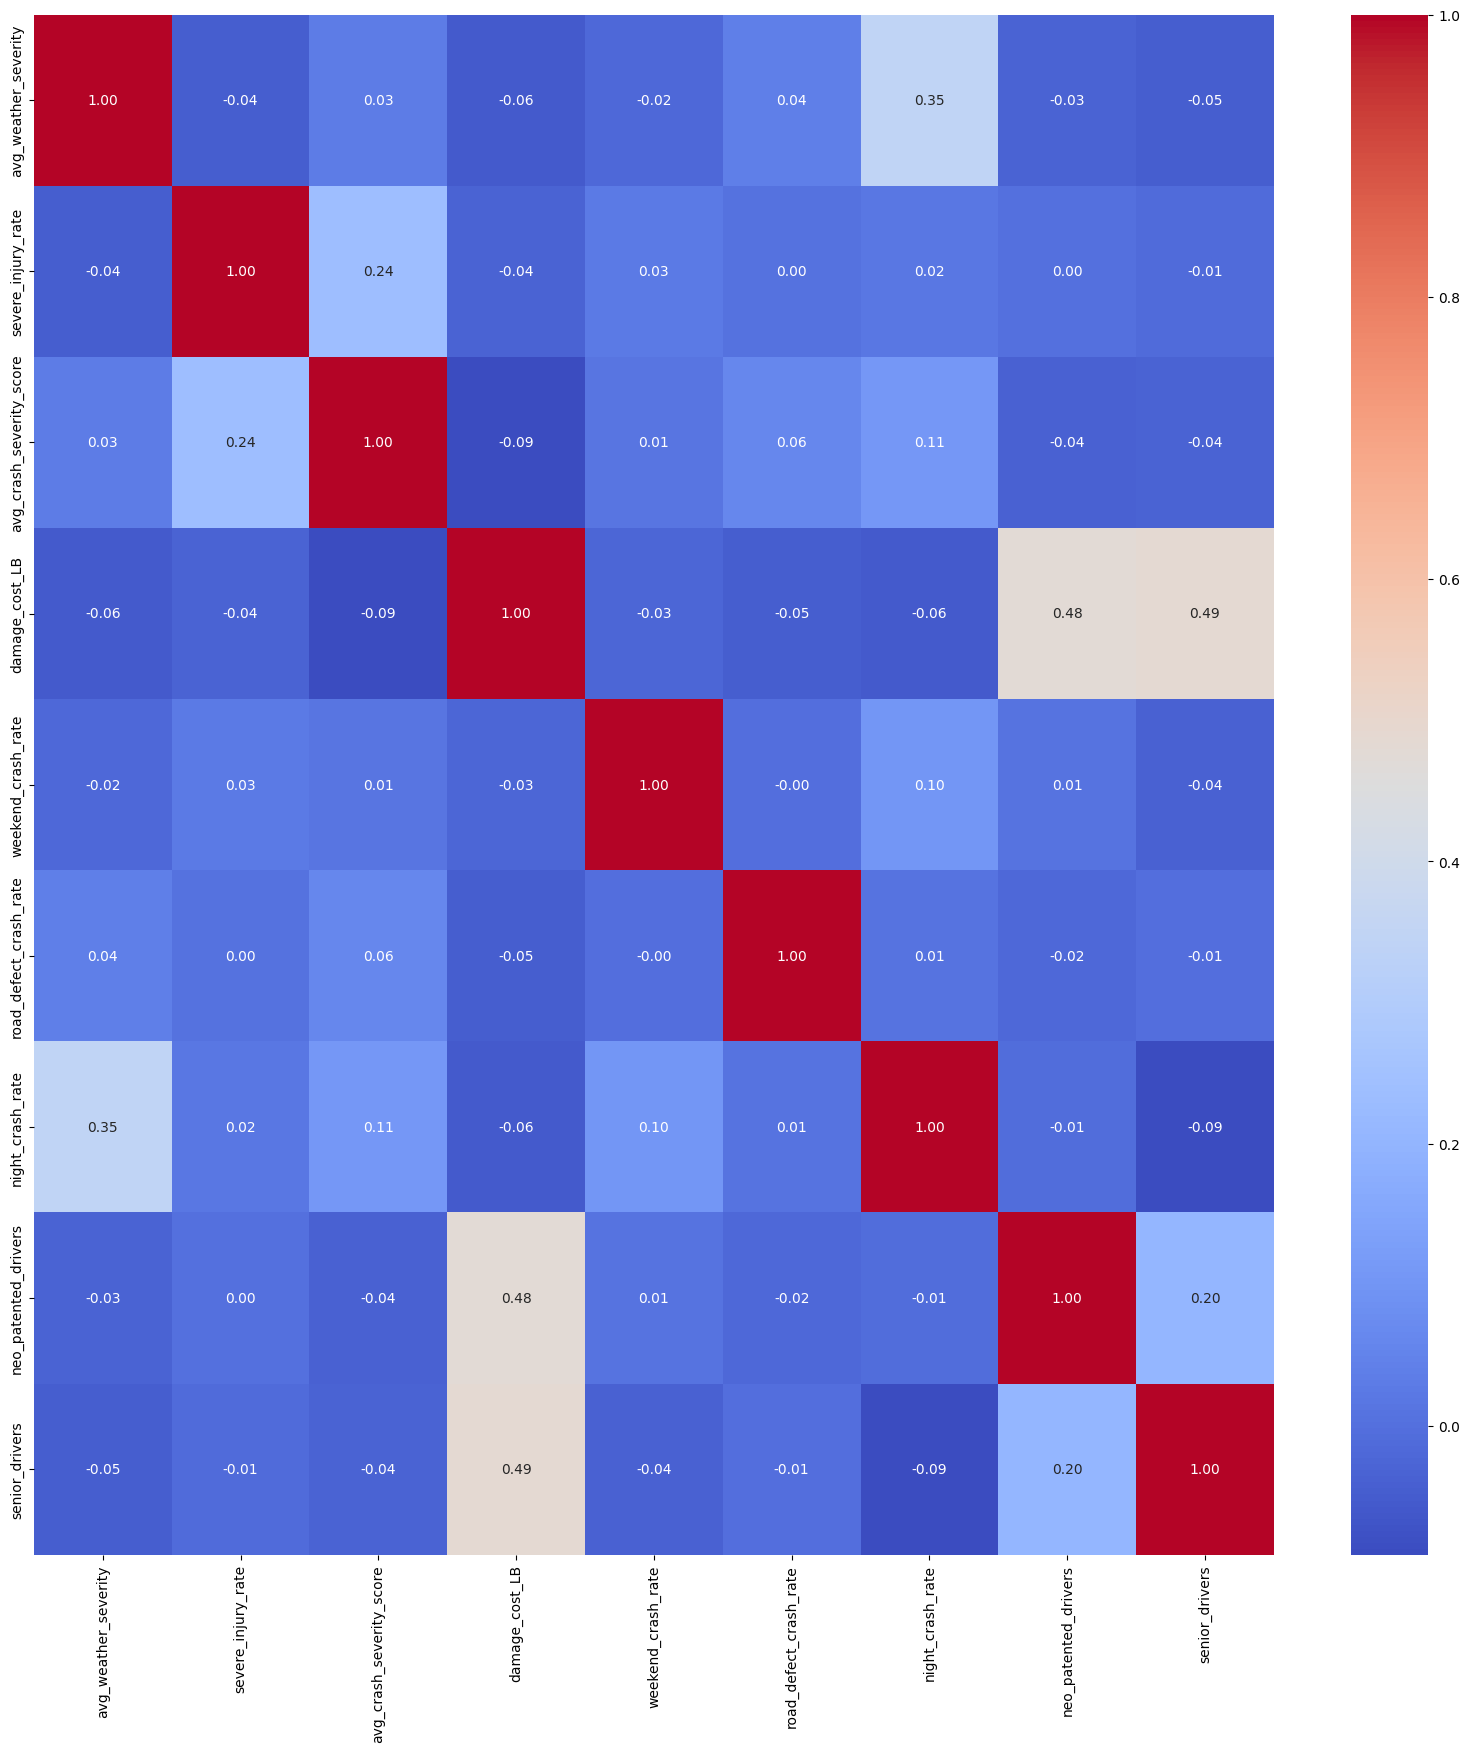

In [3]:
selected_features = ['avg_age', 'avg_weather_severity', 'fatality_rate', 'severe_injury_rate', 
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB', 'speeding_influence',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate','avg_responsibility_score']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate']

selected_features = ['avg_weather_severity', 'severe_injury_rate', "avg_crash_severity_score",
                     'damage_cost_LB',
           'weekend_crash_rate','road_defect_crash_rate','night_crash_rate',"neo_patented_drivers","senior_drivers"]

plt.figure(figsize=(20, 20))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Some of them can be exchanged. Es. Damage_cost_LB with vehicle_involement_rate

In [4]:
#Possible features to use for validation 
validation_features = list(set(columns) - set(selected_features))
validation_features

['vehicle_involvement_rate',
 'total_crashes',
 'avg_age',
 'damage_low',
 'speeding_influence',
 'avg_responsibility_score',
 'damage_medium',
 'fatality_rate',
 'damage_high',
 'injury_severity_score',
 'avg_roadway_severity',
 'num_towed_units_LB',
 'avg_lighting_severity',
 'adverse_weather_crash_rate']

## Standard Scaler

In [5]:
scaler_ss = StandardScaler()
df_cluster_ss = scaler_ss.fit_transform(df[selected_features])
df_cluster_ss = pd.DataFrame(df_cluster_ss, columns=df[selected_features].columns)
df_cluster_ss.head()

avg_weather_severity  severe_injury_rate  avg_crash_severity_score  \
0              0.824700           -0.649944                 -1.893666   
1              1.273406           -0.649944                 -1.932561   
2              0.080504           -0.649944                 -1.577732   
3              0.076708            0.290063                  0.602162   
4              0.495127           -0.649944                 -1.593499   

   damage_cost_LB  weekend_crash_rate  road_defect_crash_rate  \
0       -0.800017            0.327479               -0.600599   
1       -1.021830           -1.773954               -0.600599   
2       -0.777836           -1.073476               -0.600599   
3        0.663944           -0.452298                0.584639   
4        0.153776           -0.995645                0.271868   

   night_crash_rate  neo_patented_drivers  senior_drivers  
0          1.408054             -0.862960        1.743048  
1          0.546725             -0.862960       -0.280132  
2         -0.529936             -0.862960       -0.280132  
3          1.042395             -0.862960        1.068655  
4          0.762057              0.728957       -0.280132

### Visualize the data with a 2D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_19324\2539881587.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')


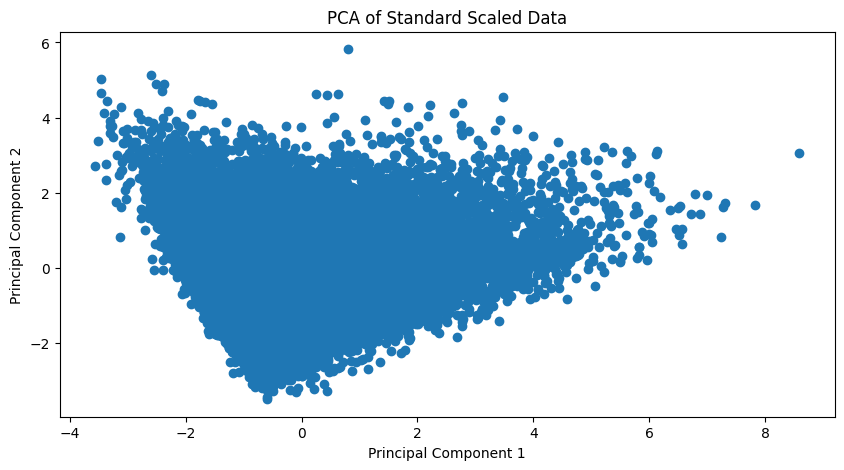

In [6]:
pca = PCA(n_components=2)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 3D PCA

C:\Users\giuli\AppData\Local\Temp\ipykernel_19324\3313555010.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')


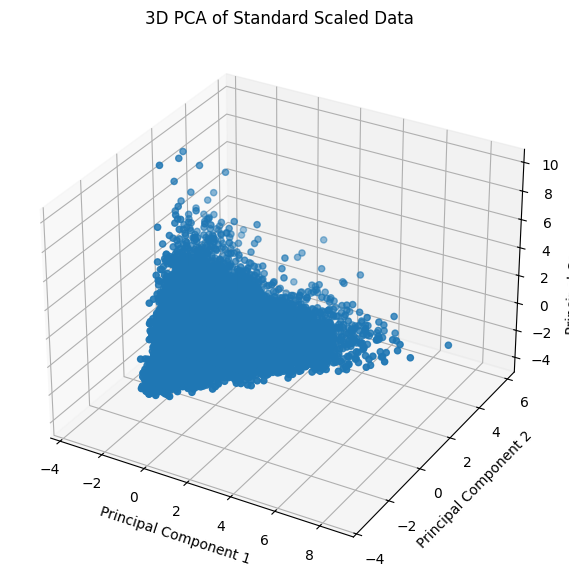

In [7]:
pca = PCA(n_components=3)
df_cluster_pca_ss = pca.fit_transform(df_cluster_ss)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], df_cluster_pca_ss[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

## MinMaxScaler

In [8]:
scaler_mm = MinMaxScaler()
df_cluster_mm = scaler_mm.fit_transform(df[selected_features])
df_cluster_mm = pd.DataFrame(df_cluster_mm, columns=df[selected_features].columns)
df_cluster_mm.head()

avg_weather_severity  severe_injury_rate  avg_crash_severity_score  \
0              0.223684            0.000000                  0.028518   
1              0.272727            0.000000                  0.024565   
2              0.142344            0.000000                  0.060626   
3              0.141929            0.085535                  0.282168   
4              0.187662            0.000000                  0.059024   

   damage_cost_LB  weekend_crash_rate  road_defect_crash_rate  \
0        0.084833            0.300000                0.000000   
1        0.059126            0.000000                0.000000   
2        0.087404            0.100000                0.000000   
3        0.254499            0.188679                0.098113   
4        0.195373            0.111111                0.072222   

   night_crash_rate  neo_patented_drivers  senior_drivers  
0          0.583333              0.000000        0.285714  
1          0.453704              0.000000        0.071429  
2          0.291667              0.000000        0.071429  
3          0.528302              0.000000        0.214286  
4          0.486111              0.142857        0.071429

C:\Users\giuli\AppData\Local\Temp\ipykernel_19324\1883562660.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')


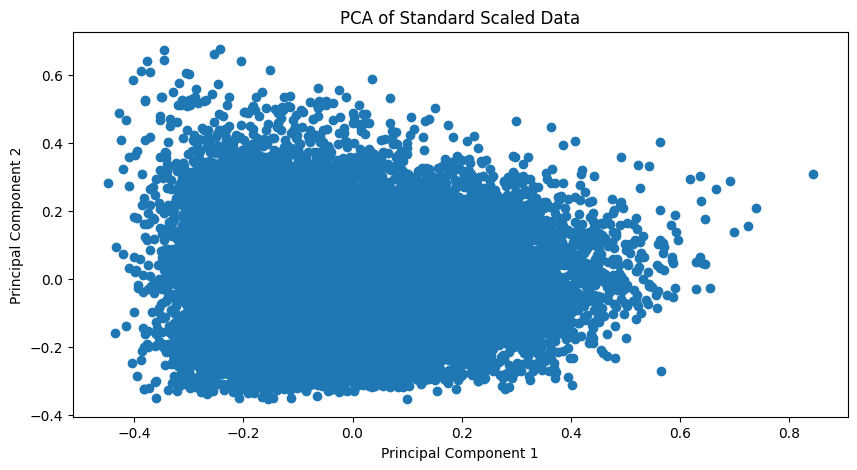

In [9]:
pca = PCA(n_components=2)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], cmap='viridis')
plt.title('PCA of Standard Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\giuli\AppData\Local\Temp\ipykernel_19324\3296546043.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')


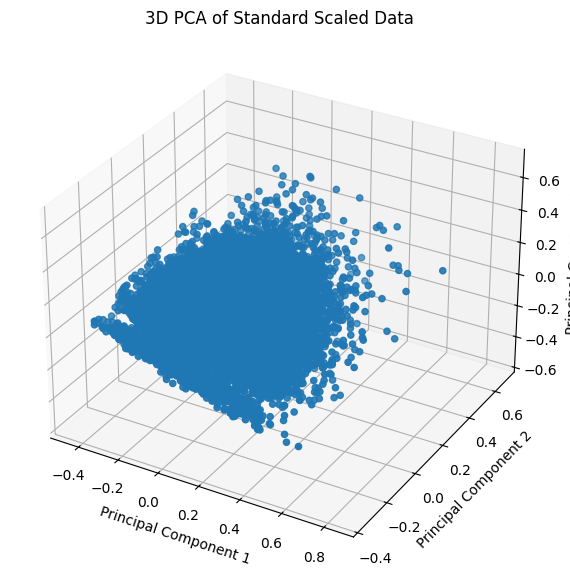

In [10]:
pca = PCA(n_components=3)
df_cluster_pca_mm = pca.fit_transform(df_cluster_mm)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster_pca_mm[:, 0], df_cluster_pca_mm[:, 1], df_cluster_pca_mm[:, 2], cmap='viridis')
ax.set_title('3D PCA of Standard Scaled Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# K-Means

### Best random_state

In [11]:
rang = range(2, 18)

In [12]:
""" sse = []
for random_state in range(1, 201):
    best_sse = float('inf')
    for k in rang:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df_cluster_ss)
        if kmeans.inertia_ < best_sse:
            best_sse = kmeans.inertia_
    sse.append(best_sse)

best_random_state = sse.index(min(sse)) + 1
plt.figure(figsize=(10, 5))
plt.plot(range(1, 201), sse, marker='o')
plt.title('Best SSE for each Random State')
plt.xlabel('Random State')
plt.ylabel('SSE')
plt.show() """
best_random_state = 20

## SSE to find the optimal K

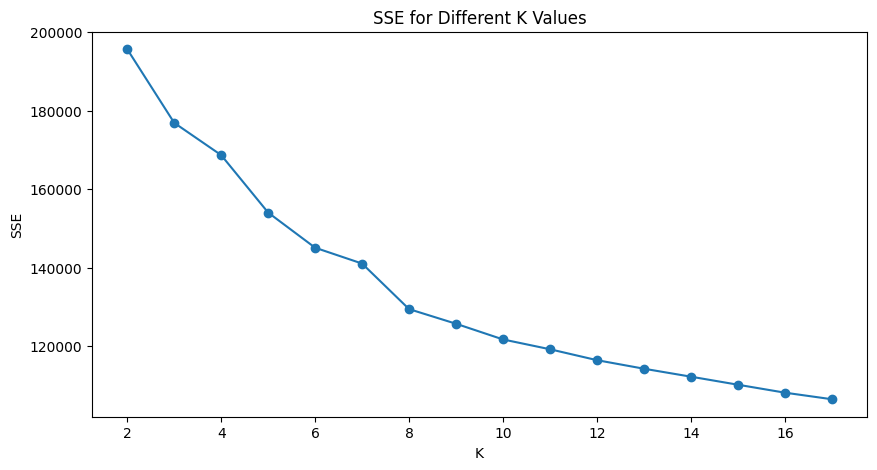

In [13]:
#plot sse for different k values
sse = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(rang, sse, marker='o')
plt.title('SSE for Different K Values')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


## Silhouette with different K

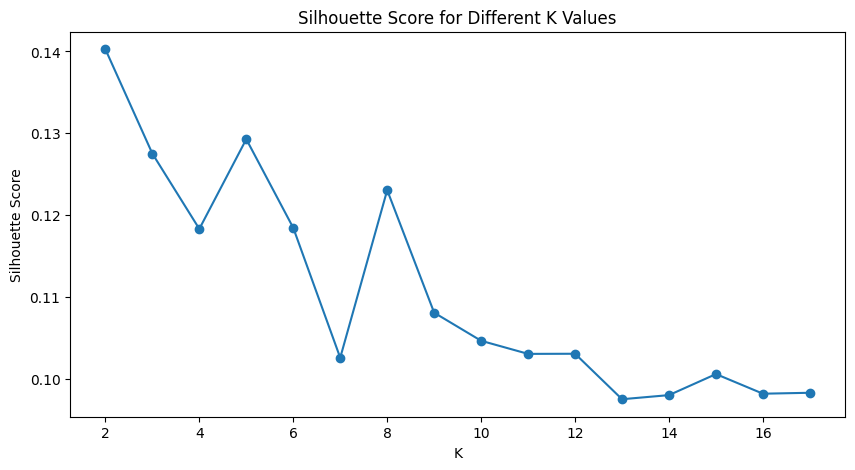

In [14]:
#silhouette score
sil = []
for k in rang:
    kmeans = KMeans(n_clusters=k, random_state=best_random_state)
    kmeans.fit(df_cluster_ss)
    sil.append(silhouette_score(df_cluster_ss, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(rang, sil, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


In [15]:
#kmeans clustering with k = 4
kmeans = KMeans(n_clusters=5, random_state=best_random_state)
kmeans.fit(df_cluster_ss)
df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

cluster
2    9199
1    5492
4    3663
3    3489
0    3235
Name: count, dtype: int64

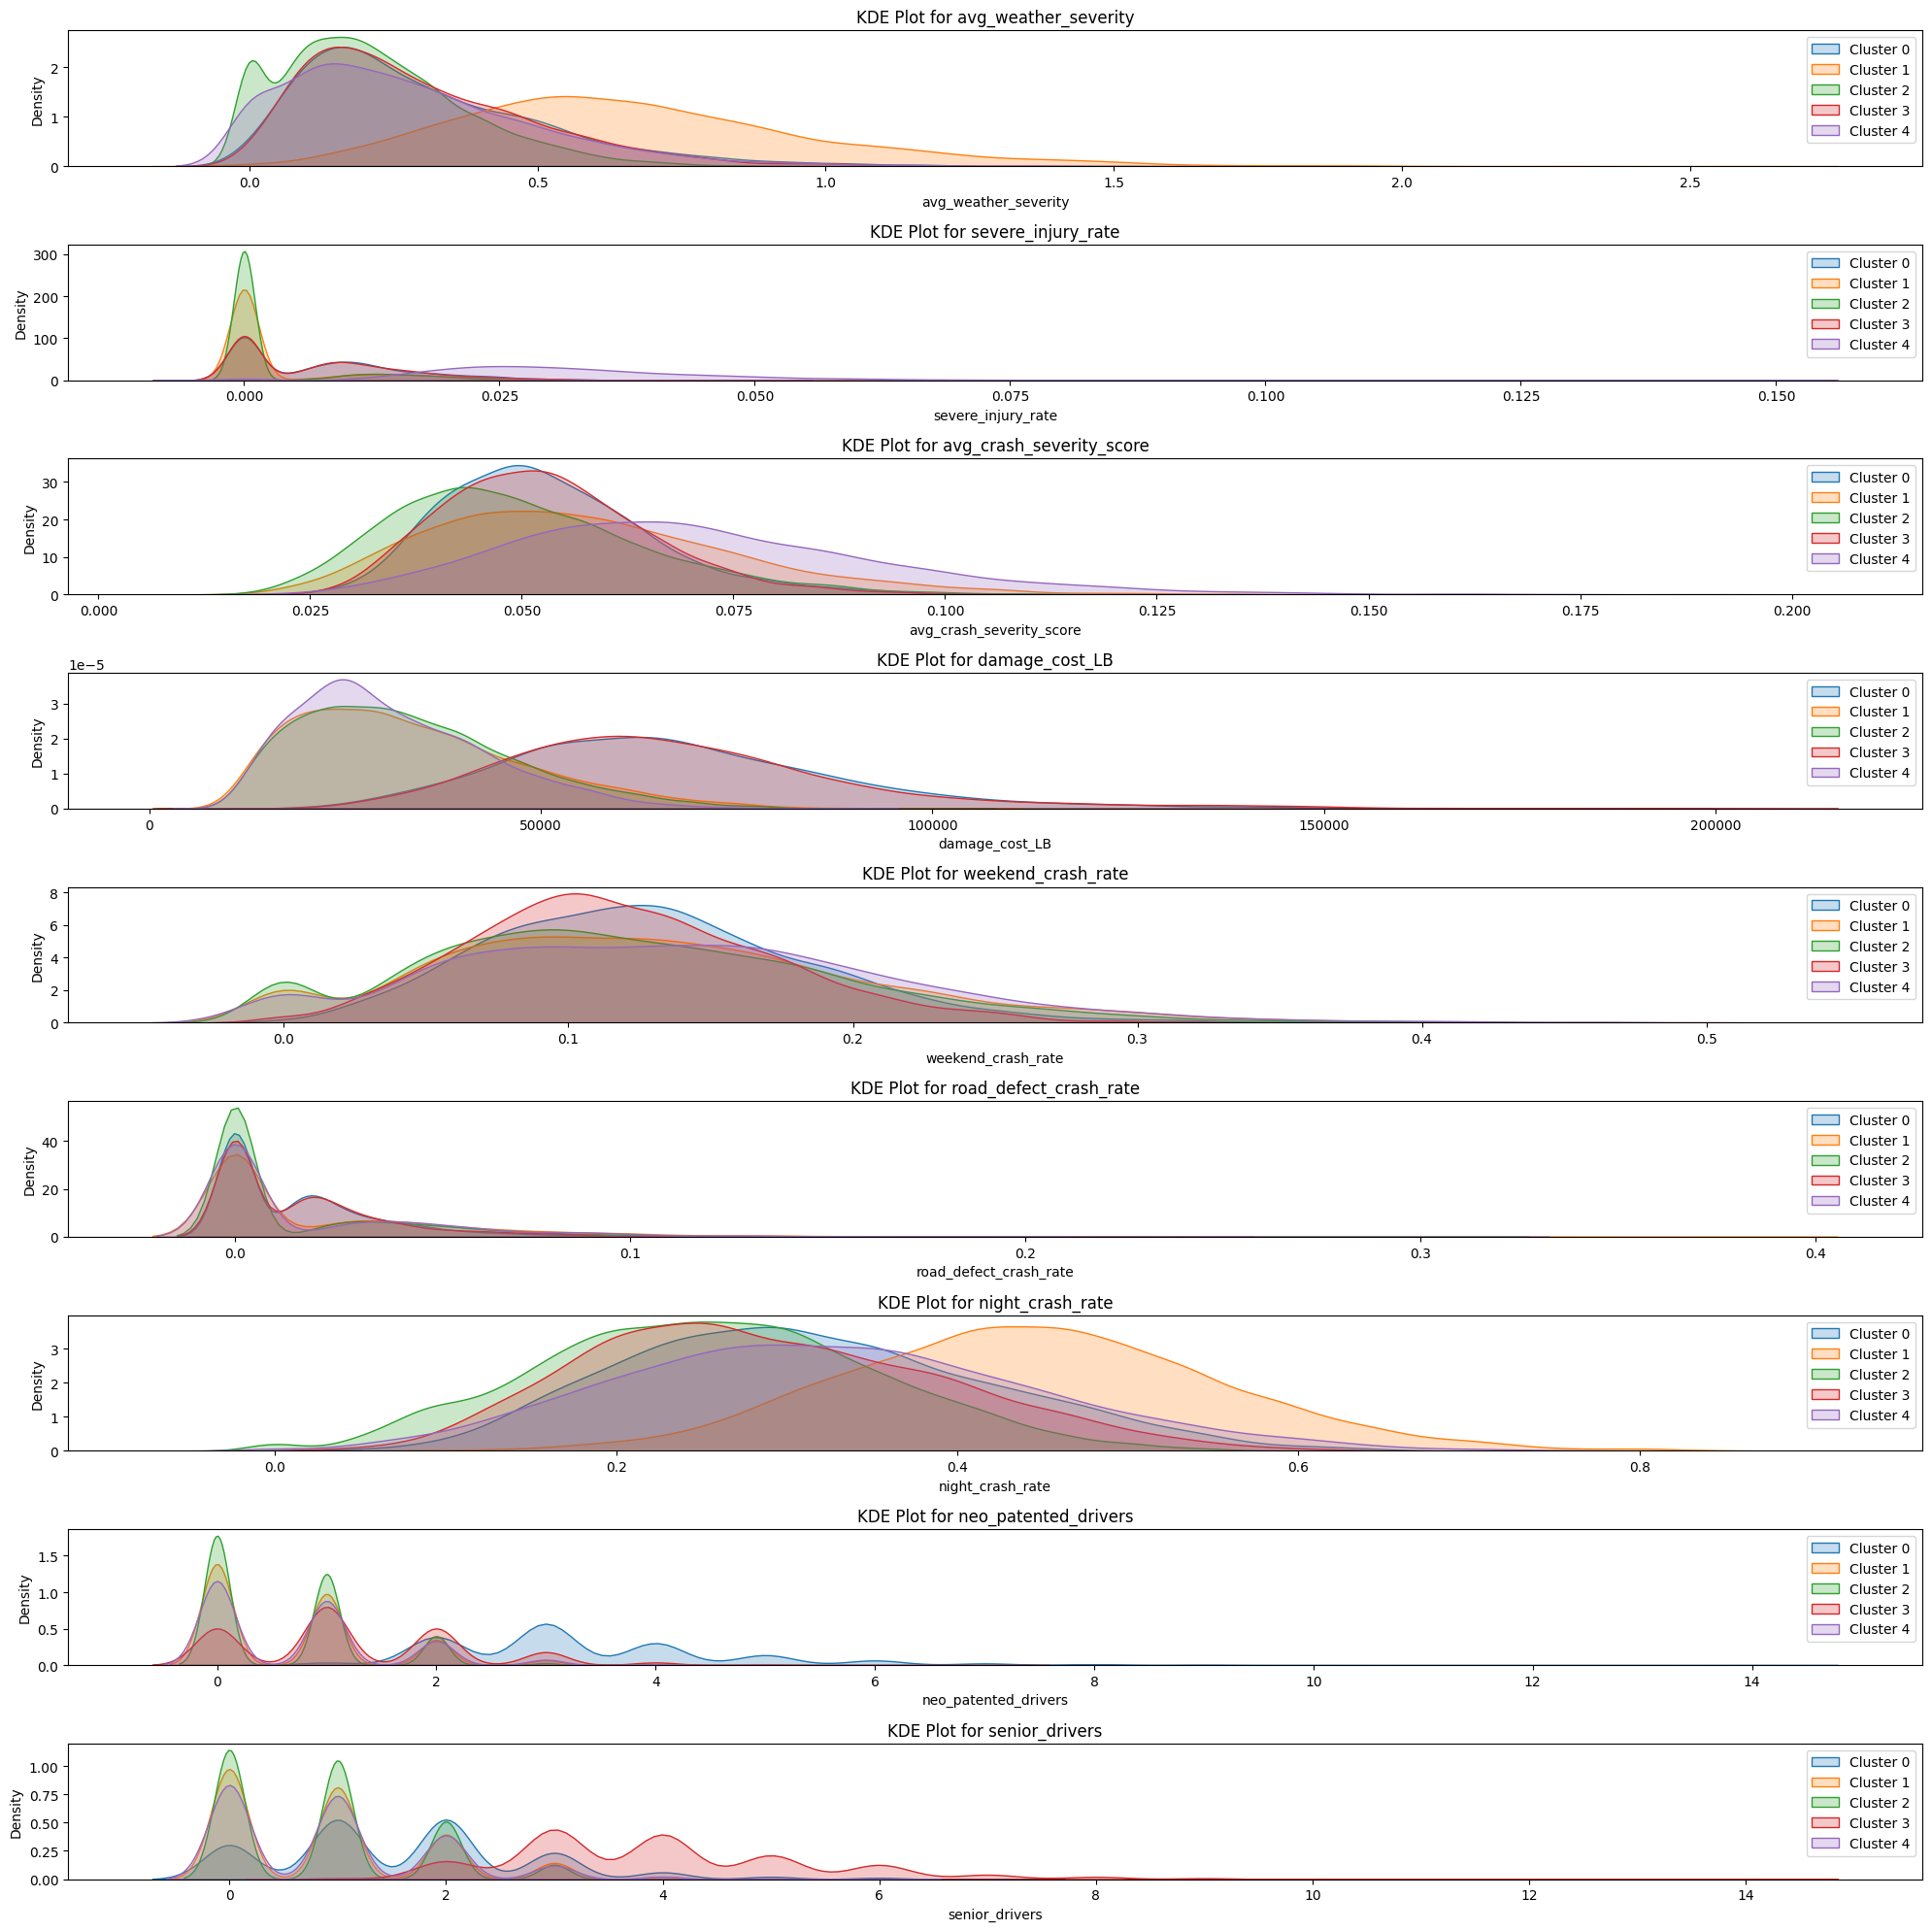

In [16]:
features = selected_features

plt.figure(figsize=(20, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    for cluster in range(kmeans.n_clusters):
        sns.kdeplot(df[df['cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'KDE Plot for {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

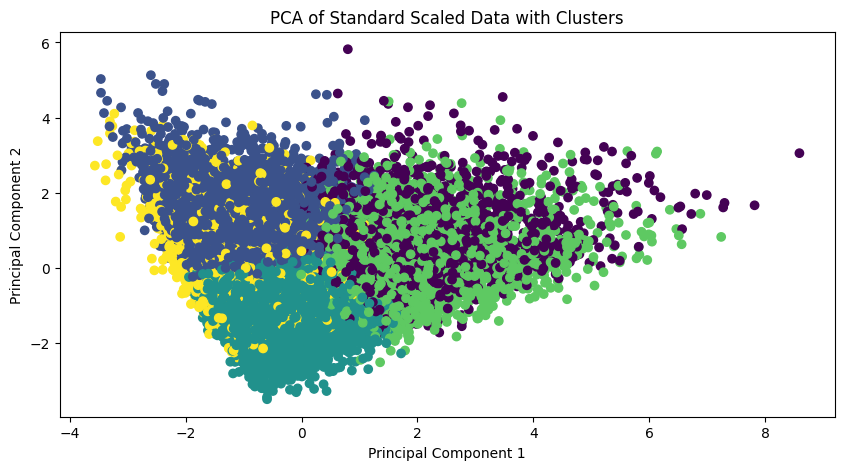

In [17]:
# show the pca plot with the cluster
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA of Standard Scaled Data with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


d:\- UNI\DM\project2\DM-Project2\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


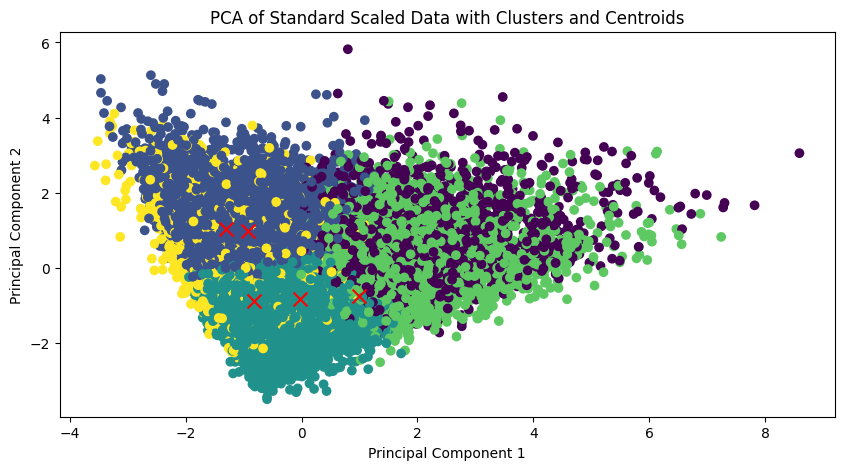

In [18]:
#show the centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 5))
plt.scatter(df_cluster_pca_ss[:, 0], df_cluster_pca_ss[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=100)
plt.title('PCA of Standard Scaled Data with Clusters and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


In [19]:
def clusters_pairplot(df, centroids):
    pairplot = sns.pairplot(
        df,
        hue='cluster',
        palette='Set1',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.5}
    )

    for i, ax in enumerate(pairplot.axes.flat):
        # Get features for each subplot
        row_feature = pairplot.axes.flat[i].get_ylabel()
        col_feature = pairplot.axes.flat[i].get_xlabel()

        # Add centroids only to relevant scatter plots, excluding diagonal ones
        if row_feature in df.columns and col_feature in df.columns:
            ax.scatter(
                centroids[:, df.columns.get_loc(col_feature)],  
                centroids[:, df.columns.get_loc(row_feature)], 
                marker='x', s=100, c='black', label='Centroid'
            )

    plt.legend()
    plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_19324\1798328297.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


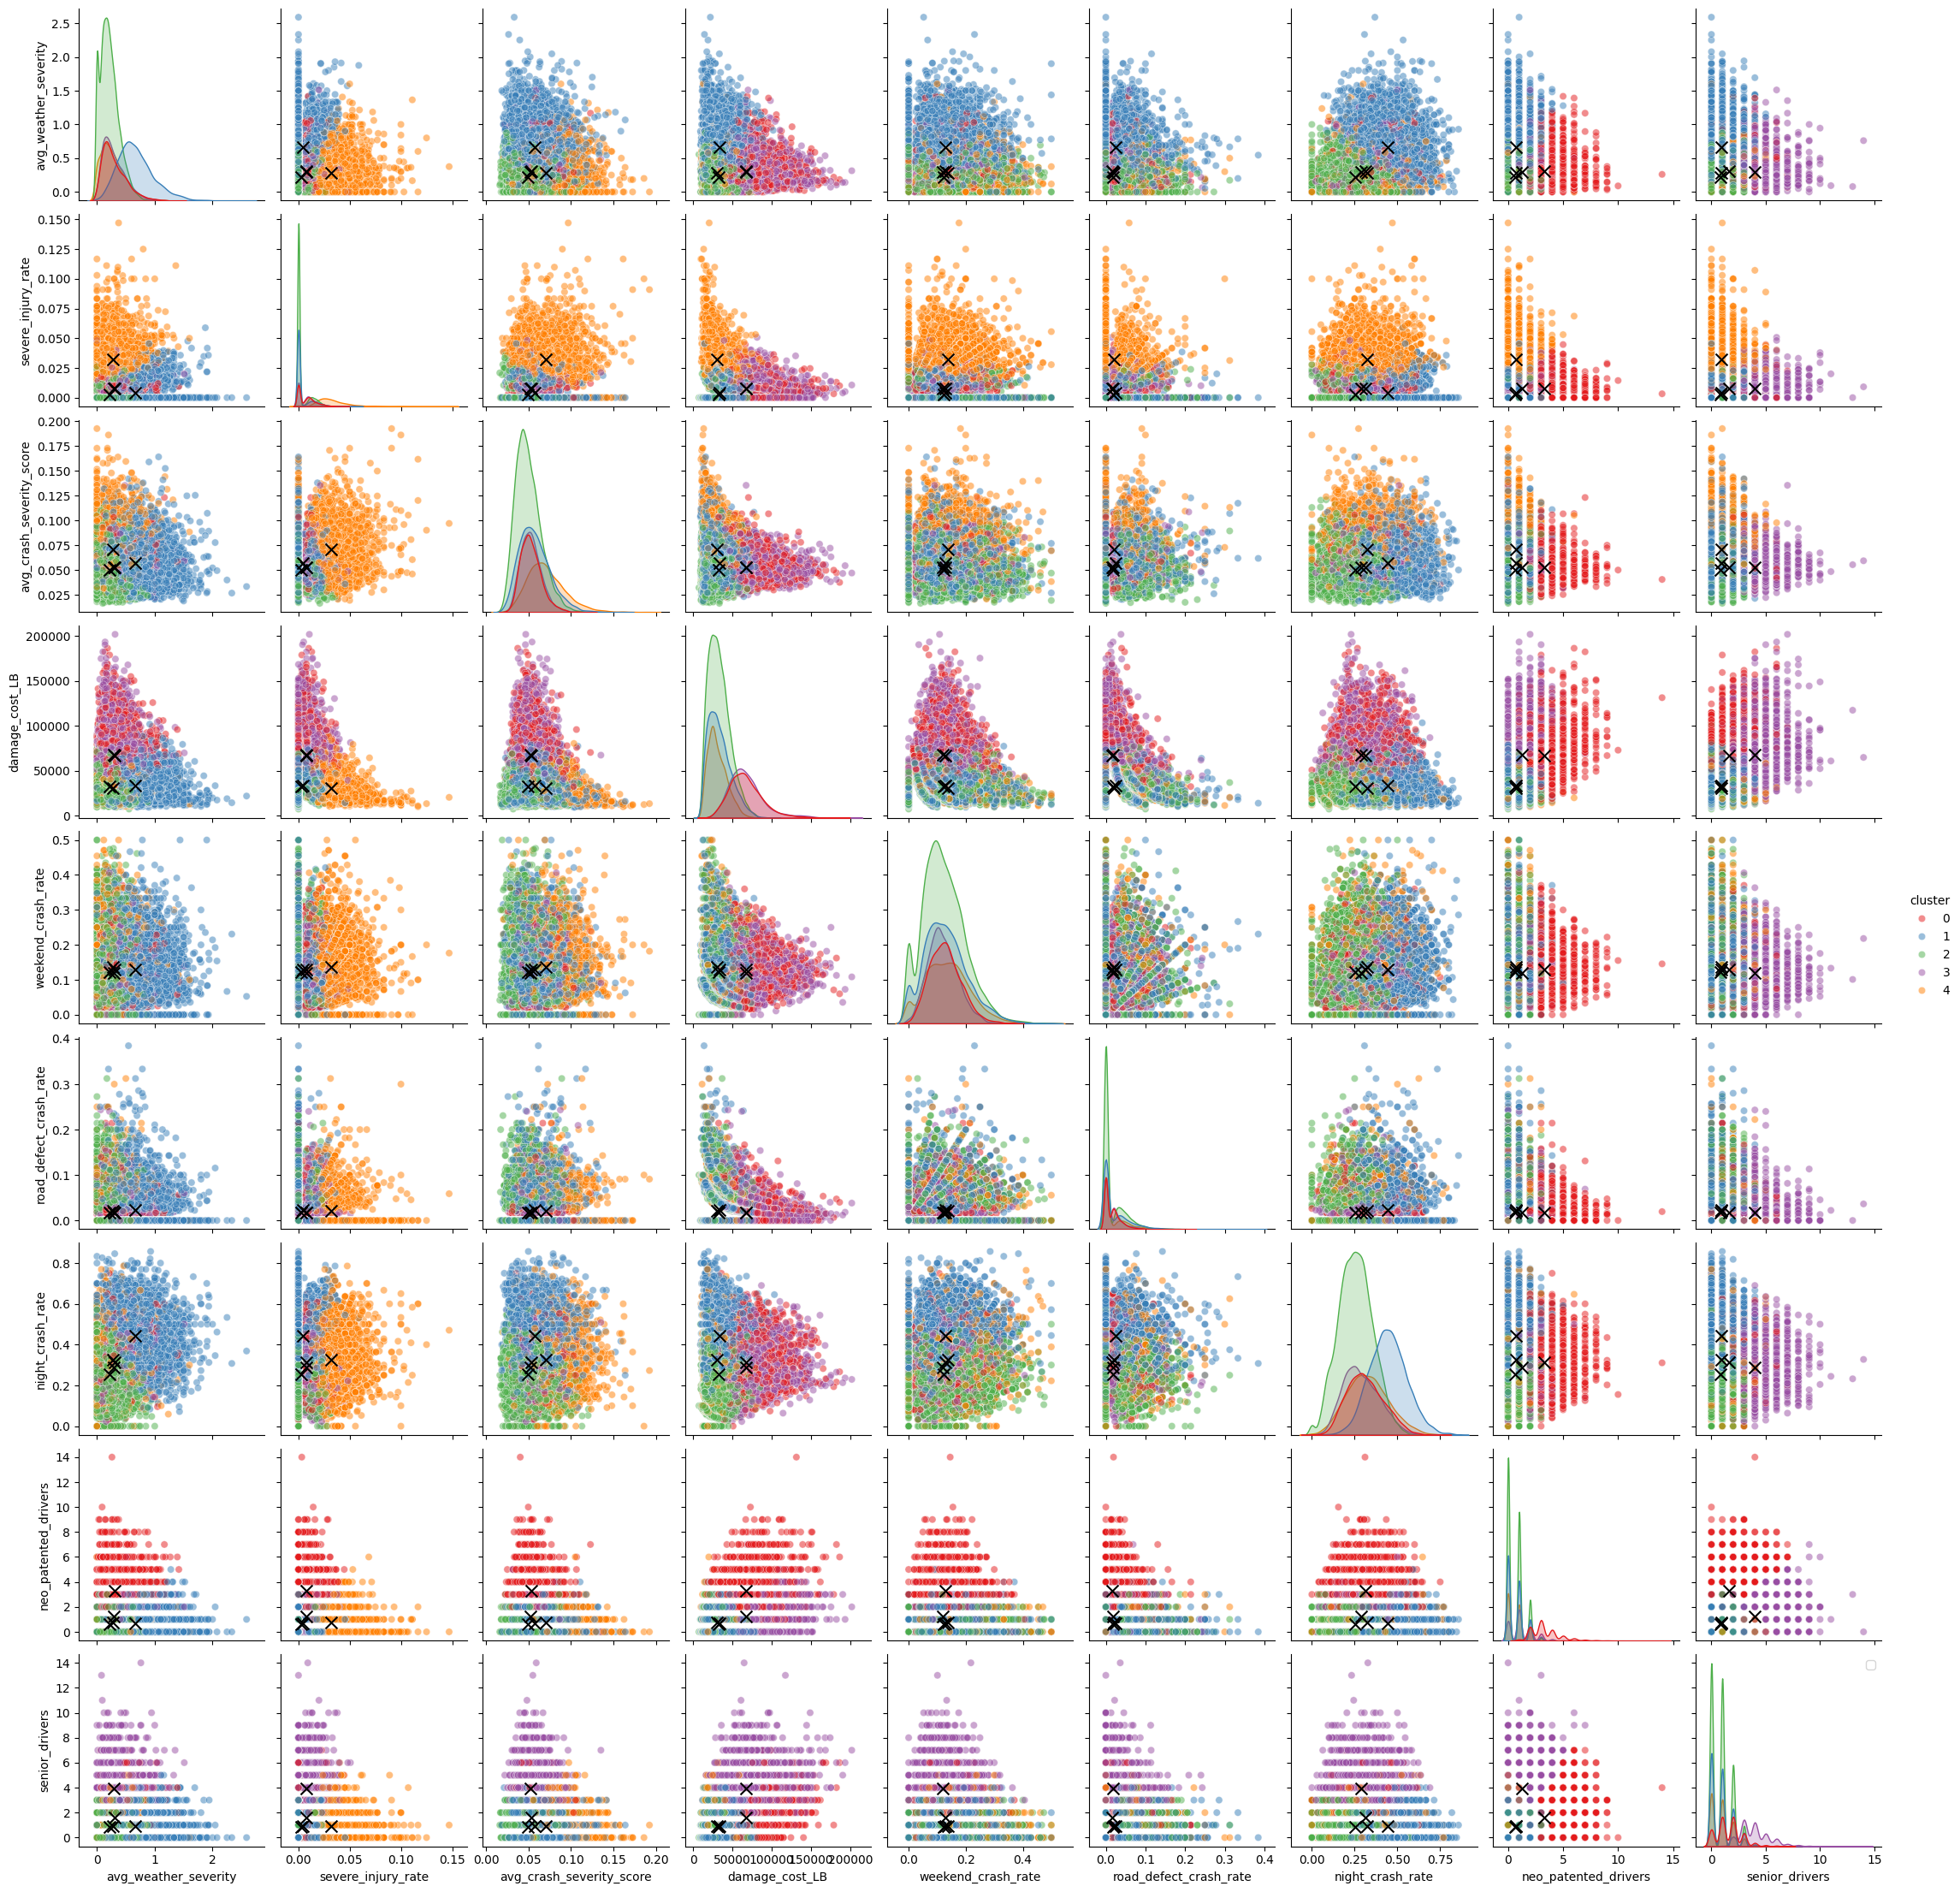

In [20]:
clusters_pairplot(df[selected_features + ['cluster']], scaler_ss.inverse_transform(centroids))